In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from tabulate import tabulate

In [4]:
IDList = []
AdjP = []
PList = []
tValues = []
BValues = []
logFCs = []
GeneSymbols = []
GeneTitles = []
GeneIDs = []
with open("Data from GEO2R - One Experimental Group.csv", newline='') as cfile: ##replace filepath
    genomedata = csv.DictReader(cfile)
    for row in genomedata:
        if (row['Gene.symbol']!=""):
            IDList.append(row['ID'])
            AdjP.append(float(row['adj.P.Val']))
            PList.append(float(row['P.Value']))
            tValues.append(float(row['t']))
            BValues.append(float(row['B']))
            logFCs.append(float(row['logFC']))
            GeneSymbols.append(row['Gene.symbol'])
            GeneTitles.append(row['Gene.title'])
            GeneIDs.append(row['Gene.ID'])

In [5]:
FilteredIDs = []
FlogFCs = []
FGeneSymbols = []
FGeneTitles = []
for p in range(len(PList)):
    if (PList[p]>0.99):
        FilteredIDs.append(IDList[p])
        FlogFCs.append(logFCs[p])
        FGeneSymbols.append(GeneSymbols[p])
        FGeneTitles.append(GeneTitles[p])

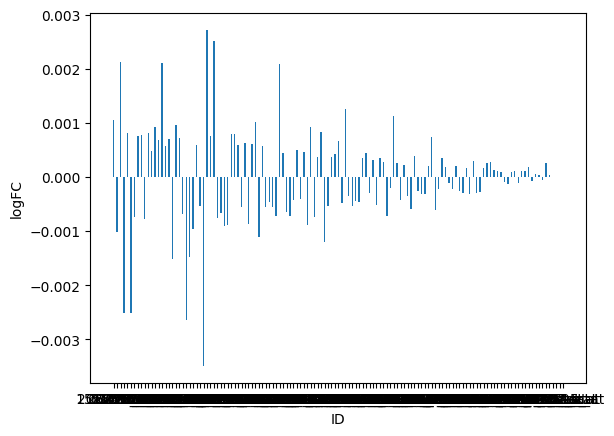

In [6]:
plt.bar(FilteredIDs, FlogFCs, width = 0.4)
plt.xlabel("ID")
plt.ylabel("logFC")
plt.show()

In [7]:
tabledata = []
for i in range(len(FilteredIDs)):
    tabledata.append([FilteredIDs[i],FlogFCs[i],FGeneSymbols[i],FGeneTitles[i]])
head = ["ID","logFC","Gene Symbols","Gene Titles"]

In [8]:
print(tabulate(tabledata, headers=head))

ID                logFC  Gene Symbols                               Gene Titles
------------  ---------  -----------------------------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
206412_at      0.00105   FER                                        FER tyrosine kinase
1557876_at    -0.00101   LINC01020                                  long intergenic non-protein coding RNA 1020
63825_at       0.00213   ABHD2                                      abhydrolase domain containing 2
232235_at     -0.00251   DSEL                                       dermatan sulfate epimerase-like
210364_at      0.000819  SCN2B                                      sodium voltage-gated channel beta subunit 2
226872_at     -0.00252   RFX2                                       regulatory factor X2
242332_at     -0.00074   FENDRR                                   

In [9]:
logssorted = sorted(FlogFCs)[:5]+sorted(FlogFCs)[-5:]

In [10]:
print(logssorted)

[-0.00349, -0.00264, -0.00252, -0.00251, -0.00151, 0.00209, 0.0021, 0.00213, 0.00252, 0.00272]


In [11]:
SortedIDs = []
for i in range(len(logssorted)):
    for j in range(len(tabledata)):
        if((tabledata[j][1])==(logssorted[i])):
            print(tabledata[j][0],"added")
            SortedIDs.append(tabledata[j][0])
            break

242625_at added
203108_at added
226872_at added
232235_at added
231909_x_at added
203913_s_at added
229032_at added
63825_at added
201925_s_at added
204971_at added


In [12]:
print(SortedIDs)

['242625_at', '203108_at', '226872_at', '232235_at', '231909_x_at', '203913_s_at', '229032_at', '63825_at', '201925_s_at', '204971_at']


Text(0, 0.5, 'logFC')

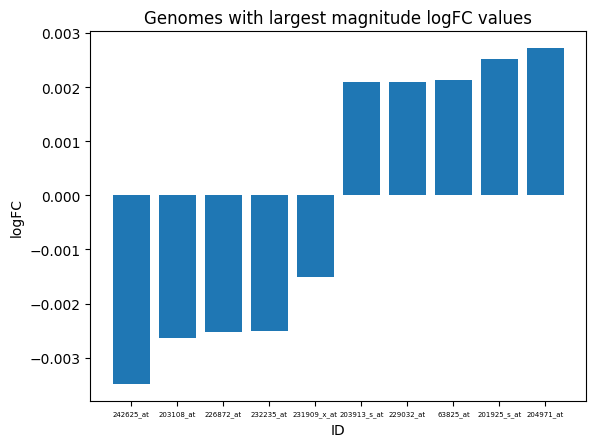

In [13]:
plt.bar(SortedIDs,logssorted)
plt.title("Genomes with largest magnitude logFC values")
plt.xticks(fontsize=5)
plt.xlabel("ID")
plt.ylabel("logFC")

In [14]:
##This writes to a csv the list of genomes sorted by logFC, can take a long time for larger lists
logssorted = [abs(element) for element in FlogFCs]
logssorted = sorted(logssorted)
SortedIDs = []
SortedGenes = []
SortedTitles = []
for i in range(len(logssorted)):
    for j in range(len(tabledata)):
        if((abs(tabledata[j][1]))==logssorted[i]):
            SortedIDs.append(tabledata[j][0])
            SortedGenes.append(tabledata[j][2])
            SortedTitles.append(tabledata[j][3])
            tabledata[j][1] = 0 #to prevent duplicates
            break
sortedtabledata = []
for i in range(len(FilteredIDs)):
    for j in range(len(FilteredIDs)):
        if (logssorted[i]==abs(FlogFCs[j])):
            sortedtabledata.append([SortedIDs[i],FlogFCs[j],SortedGenes[i],SortedTitles[i]])
            break
sortedtabledata.insert(0,['ID','logFC','Gene.Symbol','Gene.Title'])

In [16]:
with open('output.csv','w', newline='') as f:
    writer=csv.writer(f)
    writer.writerows(sortedtabledata)

In [17]:
SortedIDs = []
SortedGenes = []
SortedTitles = []
logssorted = []
with open('output_with_shortened_list.csv', newline='') as o:
    interestgenes = csv.DictReader(o)
    for row in interestgenes:
        SortedIDs.append(row["ID"])
        SortedGenes.append(row["Gene.Symbol"])
        SortedTitles.append(row["Gene.Title"])
        logssorted.append(float(row["logFC"]))

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/output_with_shortened_list.csv'

In [ ]:
FAdjP = []
FPList = []
FtValues = []
FBValues = []
for i in range(len(SortedIDs)):
    for j in range(len(IDList)):
        if(SortedIDs[i]==IDList[j]):
            FAdjP.append(AdjP[j])
            FPList.append(PList[j])
            FtValues.append(tValues[j])
            FBValues.append(BValues[j])
            break

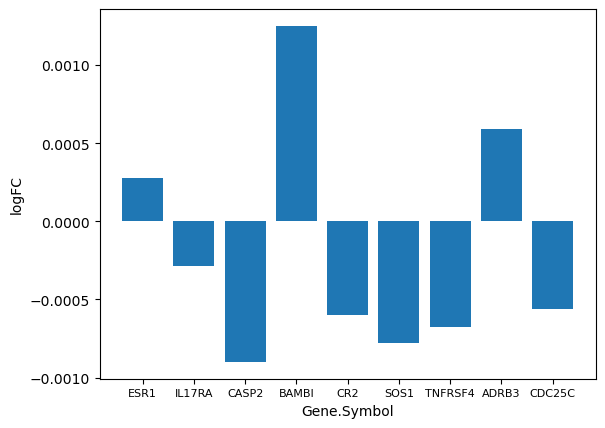

In [ ]:
completeinterestset = []
for i in range(len(SortedIDs)):
    completeinterestset.append([SortedIDs[i],FAdjP[i],FPList[i],FtValues[i],FBValues[i],logssorted[i],SortedGenes[i],SortedTitles[i]])
plt.bar(SortedGenes[:9],logssorted[:9])
plt.xlabel("Gene.Symbol")
plt.xticks(fontsize=8)
plt.ylabel("logFC")
completeinterestset.insert(0,["ID","Adj.P.Val","P.Value","t","B","logFC","Gene.Symbol","Gene.Title"])

In [ ]:
with open('InterestedOutput.csv','w', newline='') as fo:
    writer=csv.writer(fo)
    writer.writerows(completeinterestset)